In [1]:
from glob import glob
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import pydicom
from pydicom import dcmread
import os.path as osp
import os
import numpy as np
from rt_utils.image_helper import get_pixel_to_patient_transformation_matrix, apply_transformation_to_3d_points

## Utility Functions

In [9]:
def get_transformation_matrix(input):
    # load all images into series data
    # series_data = []
    # for file in glob(f"{path}/*.dcm"):
    #     ds = dcmread(file)
    #     series_data.append(ds)
    print(input)
    dicoms = sorted([osp.join(input, i) for i in os.listdir(input) if i.endswith('dcm') or i.endswith('dicom')])
    dicoms = [pydicom.dcmread(d) for d in dicoms]
    #transformation matrix that maps 2D pixels to 3D coordinates
    transformation_matrix = get_pixel_to_patient_transformation_matrix(dicoms)
 
    return transformation_matrix

def get_img_list(path):
    series_data = []
    for file in glob(f"{path}/*.dcm"):
        ds = dcmread(file)
        img1 = ds.pixel_array
        series_data.append(img1)

    return series_data

# input dcm data, index/specific location (0-19), matrix transformation
# return patient coordinates
def transform_3D(dcm_data, index, mat):
    data = dcm_data.pixel_array
    h,w = data.shape
    x = np.arange(w)
    y = np.arange(h)
    x, y = np.meshgrid(x, y)
    x = x.reshape(-1, 1)
    y = y.reshape(-1, 1)
    points = np.concatenate((x, y), axis=1)
    # ys, xs = np.where(np.ones((h,w)))
    # coords = np.concatenate((ys.reshape(-1, 1), xs.reshape(-1, 1)), axis=1)
    # extended_coords = np.concatenate((coords, np.ones((h * w, 1)) * index), axis=1)
    # y_values = points[:, 1].tolist()
    p = np.concatenate((points, np.full((len(points), 1), index)), axis=1)
    patient_coords = apply_transformation_to_3d_points(p, mat)
    #patient_coords = patient_coords.reshape(h, w, patient_coords.shape[-1])
    print (patient_coords)
    return (patient_coords, points, data)

def print_3D(patient_coords_list):
    fig = plt.figure(figsize=(10, 20))
    ax = fig.add_subplot(projection='3d')
    count = 0
    for (patient_coord, points, data) in patient_coords_list:
        data = ((data/data.max())).flatten()
        indice = np.random.choice(len(points), 100000)
        if count == 0:
            count += 1
            colors = [[c, 0, 0] for c in data[indice]]
        else:
            count -= 1
            colors = [[0, c, 0] for c in data[indice]]
        ax.scatter(patient_coord[indice,0], patient_coord[indice,1], patient_coord[indice,2], color = colors, alpha=0.1)
    ax.view_init(elev=30, azim=45)


## T2 Conversion

data/t2/
IM-6392-0014.dcm
[[-111.78468323  -73.55931854  -82.72187805]
 [-111.15968323  -73.55931854  -82.72187805]
 [-110.53468323  -73.55931854  -82.72187805]
 ...
 [  86.34031677  125.81568146  -82.72187805]
 [  86.96531677  125.81568146  -82.72187805]
 [  87.59031677  125.81568146  -82.72187805]]
IM-6392-0015.dcm
[[-111.78468323  -73.55931854  -79.12187791]
 [-111.15968323  -73.55931854  -79.12187791]
 [-110.53468323  -73.55931854  -79.12187791]
 ...
 [  86.34031677  125.81568146  -79.12187791]
 [  86.96531677  125.81568146  -79.12187791]
 [  87.59031677  125.81568146  -79.12187791]]
IM-6392-0001.dcm
[[-111.78468323  -73.55931854  -75.52187777]
 [-111.15968323  -73.55931854  -75.52187777]
 [-110.53468323  -73.55931854  -75.52187777]
 ...
 [  86.34031677  125.81568146  -75.52187777]
 [  86.96531677  125.81568146  -75.52187777]
 [  87.59031677  125.81568146  -75.52187777]]
IM-6392-0017.dcm
[[-111.78468323  -73.55931854  -71.92187762]
 [-111.15968323  -73.55931854  -71.92187762]
 [-11

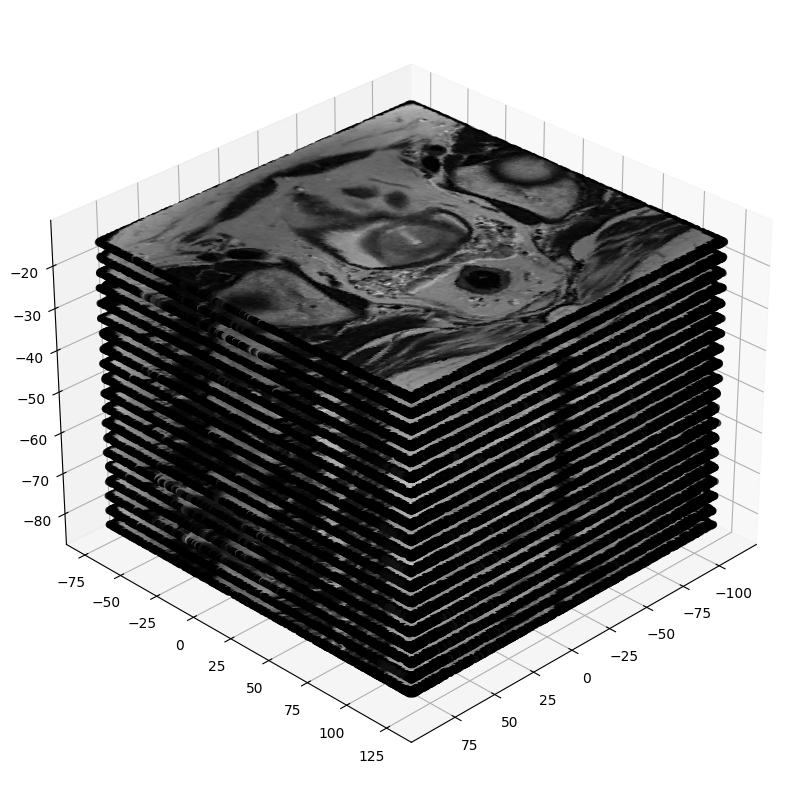

In [4]:
directory_path = 'data/t2/'
t2_mat = get_transformation_matrix('data/t2/')
new_t2_mat = np.array(t2_mat)

# Loop through the files in the directory
t2_patient_coords_list = []
for i,filename in enumerate(os.listdir(directory_path)):
    # Construct the full path to the file
    print(filename)
    full_path = os.path.join(directory_path, filename)

    t2_img1_dcm = pydicom.dcmread(full_path)
    t2_img1 = t2_img1_dcm.pixel_array

    patient_coords = transform_3D(t2_img1_dcm, i, new_t2_mat)
    t2_patient_coords_list.append(patient_coords)
print (len(t2_patient_coords_list))
print_3D(t2_patient_coords_list)

## Ktrans Conversion

data/ktrans/
slice-005.dcm
[[-141.78468323 -103.55931854  -82.72187805]
 [-140.15968323 -103.55931854  -82.72187805]
 [-138.53468323 -103.55931854  -82.72187805]
 ...
 [ 113.34031677  154.81568146  -82.72187805]
 [ 114.96531677  154.81568146  -82.72187805]
 [ 116.59031677  154.81568146  -82.72187805]]
slice-011.dcm
[[-141.78468323 -103.55931854  -79.12187815]
 [-140.15968323 -103.55931854  -79.12187815]
 [-138.53468323 -103.55931854  -79.12187815]
 ...
 [ 113.34031677  154.81568146  -79.12187815]
 [ 114.96531677  154.81568146  -79.12187815]
 [ 116.59031677  154.81568146  -79.12187815]]
slice-010.dcm
[[-141.78468323 -103.55931854  -75.52187824]
 [-140.15968323 -103.55931854  -75.52187824]
 [-138.53468323 -103.55931854  -75.52187824]
 ...
 [ 113.34031677  154.81568146  -75.52187824]
 [ 114.96531677  154.81568146  -75.52187824]
 [ 116.59031677  154.81568146  -75.52187824]]
slice-004.dcm
[[-141.78468323 -103.55931854  -71.92187834]
 [-140.15968323 -103.55931854  -71.92187834]
 [-138.534683

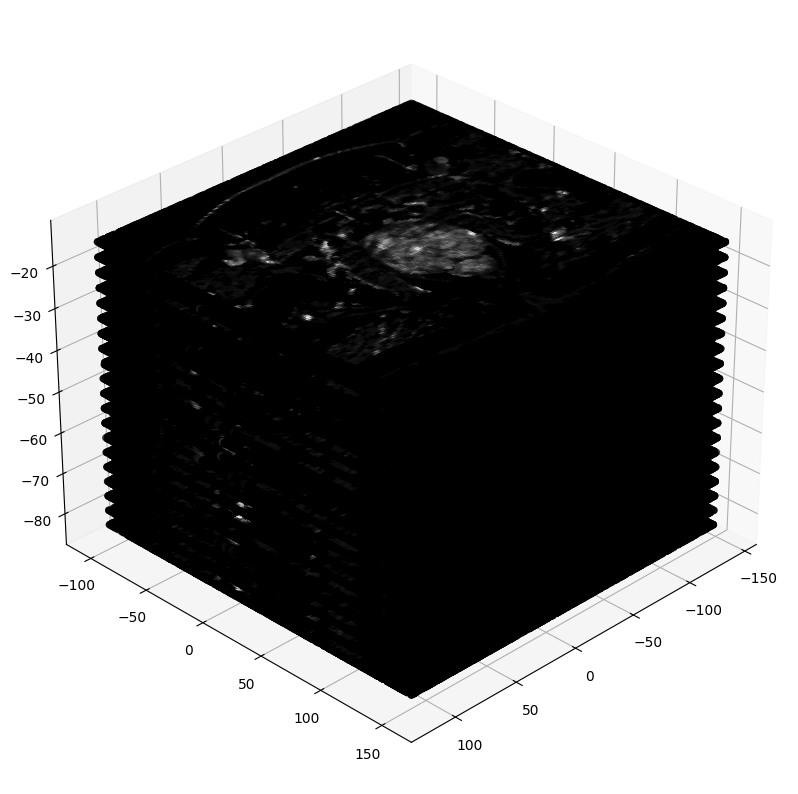

In [3]:
directory_path = 'data/ktrans/'
ktrans_mat = get_transformation_matrix('data/ktrans/')
new_ktrans_mat = np.array(ktrans_mat)

# Loop through the files in the directory
ktrans_patient_coords_list = []
for i,filename in enumerate(os.listdir(directory_path)):
    # Construct the full path to the file
    print(filename)
    full_path = os.path.join(directory_path, filename)

    ktrans_img1_dcm = pydicom.dcmread(full_path)
    ktrans_img1 = ktrans_img1_dcm.pixel_array

    patient_coords = transform_3D(ktrans_img1_dcm, i, new_ktrans_mat)
    ktrans_patient_coords_list.append(patient_coords)

print (len(ktrans_patient_coords_list))
print_3D(ktrans_patient_coords_list)

## Visualize

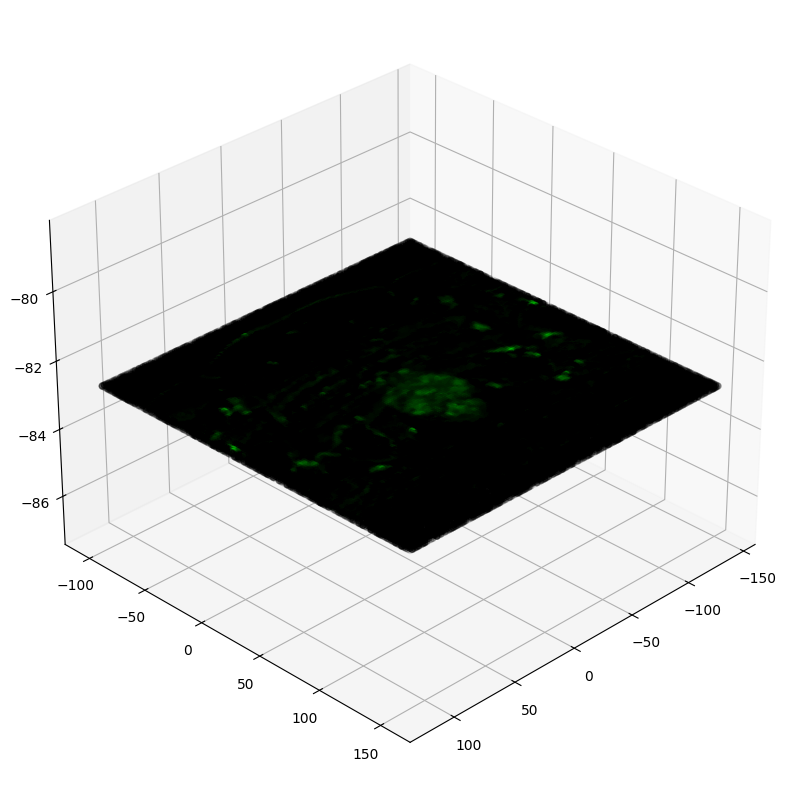

In [10]:
t2_and_ktrans_patient_coords_list = []
t2_and_ktrans_patient_coords_list.append(t2_patient_coords_list[0])
t2_and_ktrans_patient_coords_list.append(ktrans_patient_coords_list[0])


print_3D(t2_and_ktrans_patient_coords_list)